In [14]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns=1000
pd.options.display.max_rows=10000
pd.options.display.max_colwidth=-1

In [15]:
data= pd.read_csv('Country-data (1).csv')

In [16]:
df=data.copy()

In [17]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.000,6.55,48.6000,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.500,6.03,58.9000,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.800,4.40,45.3000,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.800,8.73,20.9000,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.300,11.00,47.8000,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [19]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

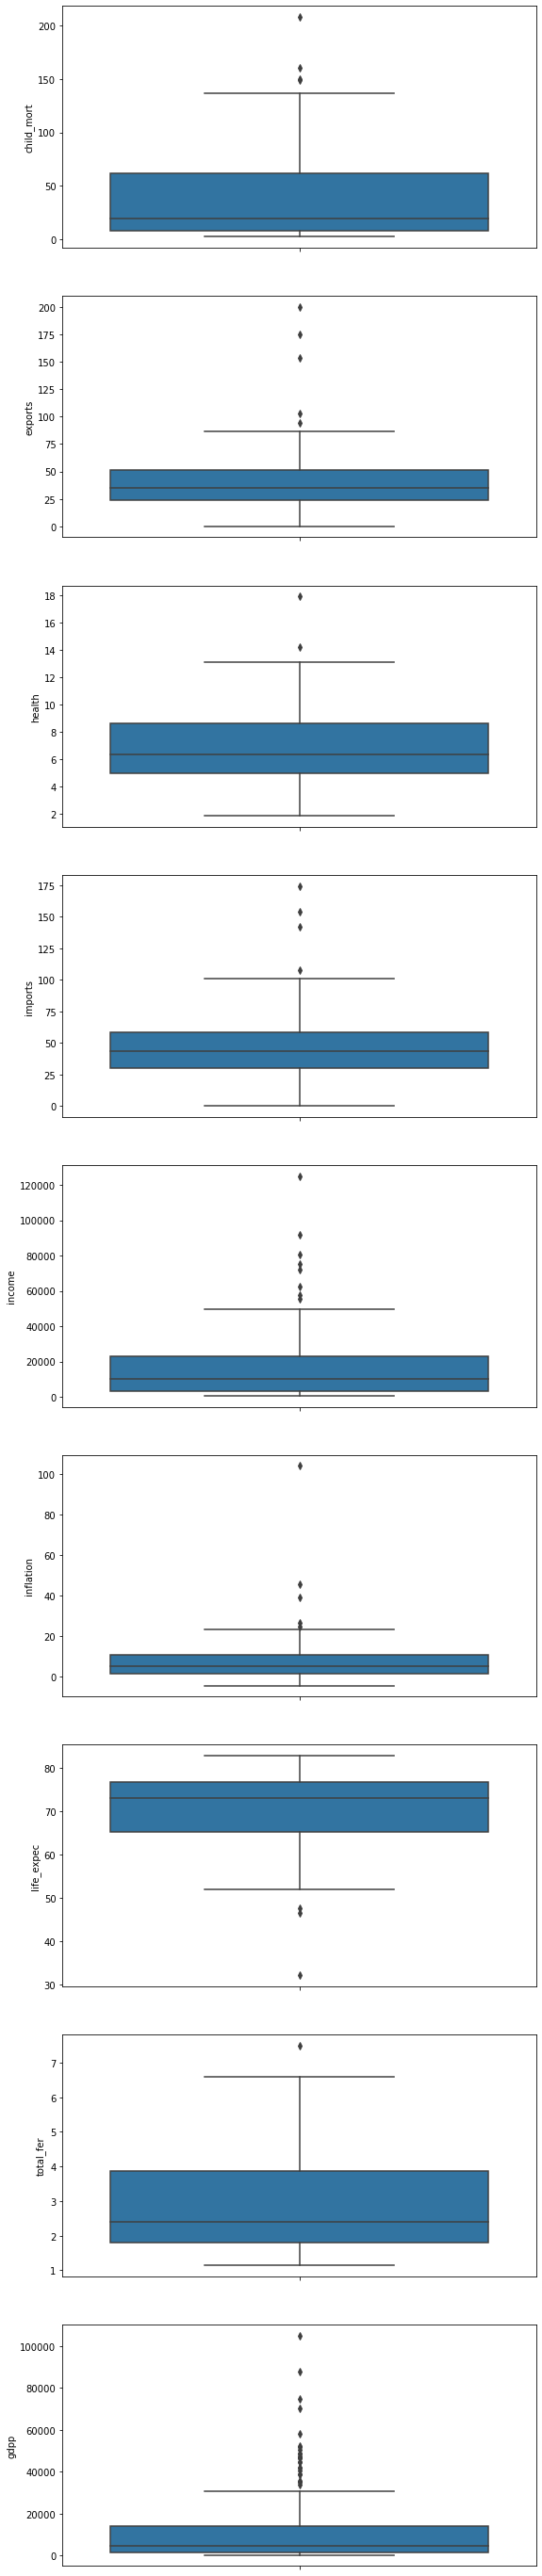

In [20]:
columns_name=df.drop('country', axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name), figsize=(9,50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i],data=df)

In [21]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn, [25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range= Q3+(1.5* IQR)
    return lower_range, upper_range

In [22]:
for col in df.drop('country', axis=1).columns:
    lowerbound,upperbound=outlier_treatment(df[col])
    df[col]=np.clip(df[col], a_min=lowerbound, a_max=upperbound)

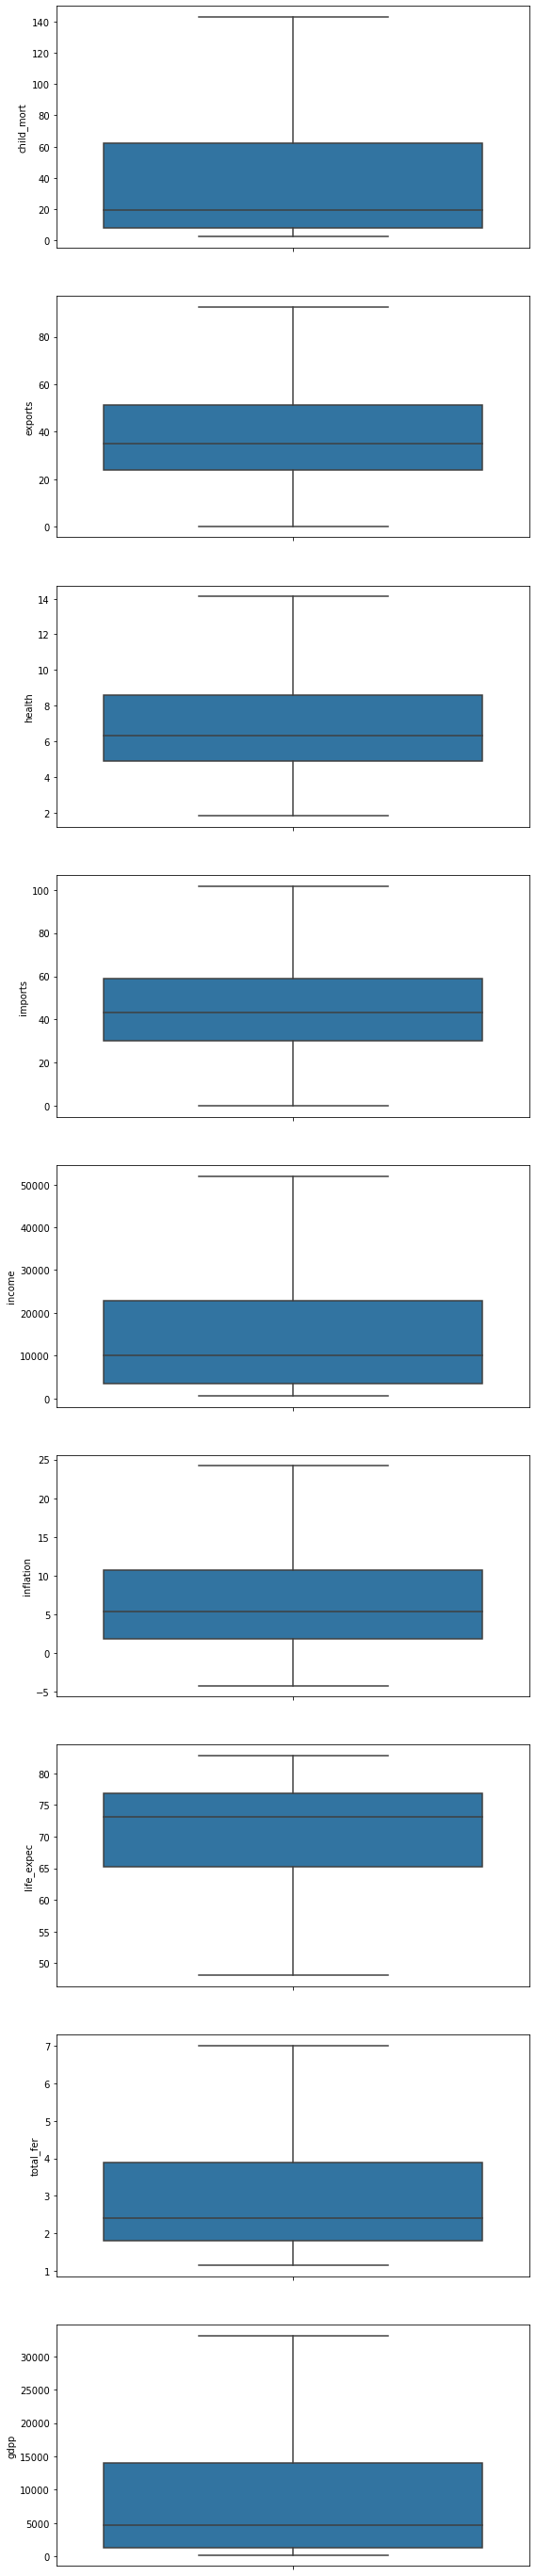

In [23]:
columns_name=df.drop('country', axis=1).columns
fig,axes=plt.subplots(nrows=len(columns_name), figsize=(9,50))
for i in range(len(columns_name)):
    sns.boxplot(ax=axes[i], y=columns_name[i],data=df)

In [43]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,167.000000,167.000000,167.000000,167.0,167.000000,167.000000,1.670000e+02,167.0
mean,-1.867500e+01,9.877988,3.039760,15.790664,-6367.5,-2.672635,58.985030,7.525000e-01,-5030.0
std,3.919738e-14,1.055032,0.171734,1.277550,0.0,0.127285,1.895044,1.558987e-15,0.0
min,-1.867500e+01,0.109000,1.810000,0.065900,-6367.5,-4.210000,48.050000,7.525000e-01,-5030.0
25%,-1.867500e+01,10.025000,3.080000,15.925000,-6367.5,-2.660000,59.550000,7.525000e-01,-5030.0
50%,-1.867500e+01,10.025000,3.080000,15.925000,-6367.5,-2.660000,59.550000,7.525000e-01,-5030.0
75%,-1.867500e+01,10.025000,3.080000,15.925000,-6367.5,-2.660000,59.550000,7.525000e-01,-5030.0
max,-1.867500e+01,10.025000,3.080000,15.925000,-6367.5,-2.660000,59.550000,7.525000e-01,-5030.0


<AxesSubplot:>

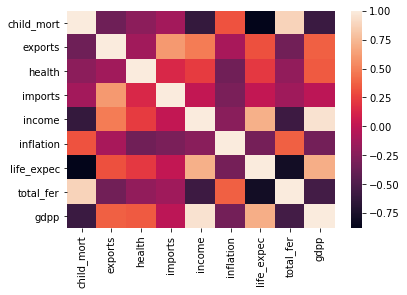

In [27]:
sns.heatmap(df.corr())

In [28]:
df_country=df['country']

In [29]:
df.set_index('country', inplace=True)

In [30]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [31]:
df_2=df

In [32]:
from sklearn.preprocessing import RobustScaler
rc=RobustScaler().fit(df)
df_scaled=rc.transform(df)
df_scaled

array([[ 1.31662024, -0.90744102,  0.3423913 , ..., -1.46956522,
         1.63549161, -0.32287736],
       [-0.05013928, -0.25408348,  0.0625    , ...,  0.27826087,
        -0.36450839, -0.04481132],
       [ 0.14856082,  0.12341198, -0.58423913, ...,  0.29565217,
         0.23021583, -0.01572327],
       ...,
       [ 0.07428041,  1.3430127 ,  0.14130435, ...,  0.        ,
        -0.2206235 , -0.26336478],
       [ 0.68709378, -0.1814882 , -0.30978261, ..., -0.48695652,
         1.08393285, -0.26336478],
       [ 1.18477252,  0.07259528, -0.11684783, ..., -1.83478261,
         1.43405276, -0.25157233]])

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
df_scaled_pca=pca.fit_transform(df_scaled)
df_scaled_pca


array([[-2.35599001, -0.37005504],
       [ 0.14671397, -0.11321079],
       [-0.38546281, -0.28423578],
       [-2.31319715,  0.84034394],
       [ 0.87898283,  0.42385543],
       [-0.03683209, -1.49175073],
       [-0.32091104, -0.21533087],
       [ 2.230989  , -1.72953507],
       [ 2.76496725, -0.45864778],
       [-0.20169606, -0.19021746],
       [ 1.48484352, -0.50347604],
       [ 1.68101384,  0.56159607],
       [-1.07500622, -0.73038078],
       [ 0.99924594, -0.09543189],
       [ 0.22558541,  0.75926061],
       [ 2.8902538 ,  0.79801972],
       [ 0.05323451,  0.97629377],
       [-2.05954631, -0.01201804],
       [-0.35993173,  0.92309428],
       [-0.77574909,  0.02615376],
       [ 0.59225569, -0.24258019],
       [-0.70923692,  0.35544659],
       [ 0.15686462, -1.68448034],
       [ 2.09932628, -0.27393831],
       [ 0.64390913,  0.48305449],
       [-2.42518368, -0.45430947],
       [-2.35906241, -0.78334508],
       [-0.65345645,  1.0351861 ],
       [-2.13716277,

In [37]:
km_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit(df_scaled_pca)
km_model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [43]:
km_model.cluster_centers_

array([[ 0.13210913,  0.25673052],
       [-1.83282542, -0.15602411],
       [ 2.35046875, -0.31078303]])

In [45]:
km_model.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1])

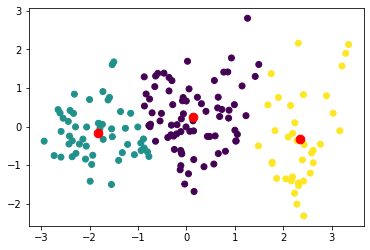

In [49]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=km_model.labels_)
centers=km_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],c="red", s=75)

In [52]:
df_kmeans=df.copy()
df_kmeans['developed status']=km_model.labels_
df_kmeans.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,developed status
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


In [53]:
df_kmeans.reset_index(inplace=True)

In [54]:
df_kmeans.groupby('developed status')[['country']].sum()

,country
developed status,
0,"AlbaniaAlgeriaAntigua and BarbudaArgentinaArmeniaAzerbaijanBarbadosBelarusBelizeBhutanBoliviaBosnia and HerzegovinaBotswanaBrazilBulgariaCambodiaCape VerdeChileChinaColombiaCosta RicaCroatiaDominican RepublicEcuadorEl SalvadorEquatorial GuineaEstoniaFijiGeorgiaGrenadaGuatemalaGuyanaHungaryIranJamaicaJordanKazakhstanKyrgyz RepublicLatviaLebanonLibyaLithuaniaMacedonia, FYRMalaysiaMaldivesMauritiusMicronesia, Fed. Sts.MoldovaMongoliaMontenegroMoroccoNamibiaOmanPanamaParaguayPeruPhilippinesPolandRomaniaRussiaSamoaSaudi ArabiaSerbiaSeychellesSolomon IslandsSt. Vincent and the GrenadinesSurinameThailandTongaTunisiaTurkeyTurkmenistanUkraineUruguayVanuatuVenezuelaVietnam"
1,"AfghanistanAngolaBangladeshBeninBurkina FasoBurundiCameroonCentral African RepublicChadComorosCongo, Dem. Rep.Congo, Rep.Cote d'IvoireEgyptEritreaGabonGambiaGhanaGuineaGuinea-BissauHaitiIndiaIndonesiaIraqKenyaKiribatiLaoLesothoLiberiaMadagascarMalawiMaliMauritaniaMozambiqueMyanmarNepalNigerNigeriaPakistanRwandaSenegalSierra LeoneSouth AfricaSri LankaSudanTajikistanTanzaniaTimor-LesteTogoUgandaUzbekistanYemenZambia"
2,AustraliaAustriaBahamasBahrainBelgiumBruneiCanadaCyprusCzech RepublicDenmarkFinlandFranceGermanyGreeceIcelandIrelandIsraelItalyJapanKuwaitLuxembourgMaltaNetherlandsNew ZealandNorwayPortugalQatarSingaporeSlovak RepublicSloveniaSouth KoreaSpainSwedenSwitzerlandUnited Arab EmiratesUnited KingdomUnited States


In [55]:
replacevalues={0: 'developing', 1:'underdeveloping', 2:'developed'}
final_df_kmeans=df_kmeans.replace({'developed status':replacevalues})

In [57]:
final_df_kmeans.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,developed status
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,underdeveloping
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,developing
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,developing
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,underdeveloping
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,developing


In [60]:
final_df_kmeans.iloc[:,10].value_counts()

developing         77
underdeveloping    53
developed          37
Name: developed status, dtype: int64

In [61]:
from sklearn.cluster import AgglomerativeClustering as AC
hierachical_model=AC(n_clusters=3,affinity="euclidean",linkage='ward')
label_pred_hierachical=hierachical_model.fit_predict(df_scaled_pca)

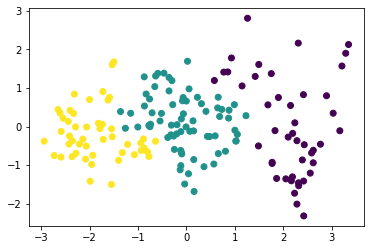

In [63]:
plt.scatter(df_scaled_pca[:,0],df_scaled_pca[:,1],c=label_pred_hierachical)

In [66]:
df_hierachical=df.copy()
df_hierachical["developed status"]=label_pred_hierachical
df_hierachical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,developed status
country,,,,,,,,,,
Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553,2
Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090,1
Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460,1
Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530,2
Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200,1
Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300,1
Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220,1
Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130,0
Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130,0


In [67]:
df_hierachical.reset_index(inplace=True)

In [68]:
df_hierachical.groupby("developed status")[["country"]].sum()

,country
developed status,
0,AustraliaAustriaBahamasBahrainBelgiumBruneiCanadaCyprusCzech RepublicDenmarkEstoniaFinlandFranceGermanyGreeceHungaryIcelandIrelandIsraelItalyJapanKuwaitLithuaniaLuxembourgMalaysiaMaldivesMaltaNetherlandsNew ZealandNorwayPanamaPortugalQatarSeychellesSingaporeSlovak RepublicSloveniaSouth KoreaSpainSwedenSwitzerlandThailandUnited Arab EmiratesUnited KingdomUnited States
1,"AlbaniaAlgeriaAntigua and BarbudaArgentinaArmeniaAzerbaijanBarbadosBelarusBelizeBhutanBoliviaBosnia and HerzegovinaBotswanaBrazilBulgariaCambodiaCape VerdeChileChinaColombiaCosta RicaCroatiaDominican RepublicEcuadorEl SalvadorEquatorial GuineaFijiGabonGeorgiaGrenadaGuyanaIranJamaicaJordanKazakhstanKiribatiKyrgyz RepublicLaoLatviaLebanonLibyaMacedonia, FYRMauritiusMicronesia, Fed. Sts.MoldovaMongoliaMontenegroMoroccoNamibiaOmanParaguayPeruPhilippinesPolandRomaniaRussiaSamoaSaudi ArabiaSerbiaSolomon IslandsSt. Vincent and the GrenadinesSurinameTajikistanTongaTunisiaTurkeyTurkmenistanUkraineUruguayVanuatuVenezuelaVietnam"
2,"AfghanistanAngolaBangladeshBeninBurkina FasoBurundiCameroonCentral African RepublicChadComorosCongo, Dem. Rep.Congo, Rep.Cote d'IvoireEgyptEritreaGambiaGhanaGuatemalaGuineaGuinea-BissauHaitiIndiaIndonesiaIraqKenyaLesothoLiberiaMadagascarMalawiMaliMauritaniaMozambiqueMyanmarNepalNigerNigeriaPakistanRwandaSenegalSierra LeoneSouth AfricaSri LankaSudanTanzaniaTimor-LesteTogoUgandaUzbekistanYemenZambia"


In [73]:
replace_values={1:"developing",2:"under developing",0:"developed"}
final_df_hierachical=df_hierachical.replace({"developed status":replace_values})
final_df_hierachical

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,developed status
0,Afghanistan,90.200,10.000,7.58,44.9000,1610.0,9.440,56.20,5.8200,553,under developing
1,Albania,16.600,28.000,6.55,48.6000,9930.0,4.490,76.30,1.6500,4090,developing
2,Algeria,27.300,38.400,4.17,31.4000,12900.0,16.100,76.50,2.8900,4460,developing
3,Angola,119.000,62.300,2.85,42.9000,5900.0,22.400,60.10,6.1600,3530,under developing
4,Antigua and Barbuda,10.300,45.500,6.03,58.9000,19100.0,1.440,76.80,2.1300,12200,developing
5,Argentina,14.500,18.900,8.10,16.0000,18700.0,20.900,75.80,2.3700,10300,developing
6,Armenia,18.100,20.800,4.40,45.3000,6700.0,7.770,73.30,1.6900,3220,developing
7,Australia,4.800,19.800,8.73,20.9000,41400.0,1.160,82.00,1.9300,33130,developed
8,Austria,4.300,51.300,11.00,47.8000,43200.0,0.873,80.50,1.4400,33130,developed
9,Azerbaijan,39.200,54.300,5.88,20.7000,16000.0,13.800,69.10,1.9200,5840,developing


In [74]:
final_df_hierachical.iloc[:,10].value_counts()

developing          72
under developing    50
developed           45
Name: developed status, dtype: int64